<a href="https://colab.research.google.com/github/htdung167/Face-Mask-Detection/blob/main/Code/PredictYOLO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**1. MOUNT**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/CS117/Yolo/darknet

/content/drive/.shortcut-targets-by-id/1A5FuNQ6DfCng0mmx--uly90KuknjIizg/CS117/Yolo/darknet


In [ ]:
!sed -i 's/LIBSO=0/LIBSO=1/' Makefile

In [ ]:
!make clean

In [ ]:
!pwd

/content/drive/.shortcut-targets-by-id/1A5FuNQ6DfCng0mmx--uly90KuknjIizg/CS117/Yolo/darknet


In [ ]:
!make

#**2. Functions**

In [ ]:
# define helper functions
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

# use this to upload files
def upload_image():
  import os
  from google.colab import files
  uploaded = files.upload()
  for name, data in uploaded.items():
    with open('image_uploaded' + name[(name.find('.')):], 'wb') as f:
      f.write(data)
      print ('saved file', name, 'to' + ' image_uploaded' + name[(name.find('.')):])


def upload_video():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)


# use this to download a file  
def download(path):
  from google.colab import files
  files.download(path)

#**3. Predict Image**

###**a. Image from Google Drive**

In [ ]:
%cd /content/drive/MyDrive/CS117/Yolo/darknet/


/content/drive/.shortcut-targets-by-id/1A5FuNQ6DfCng0mmx--uly90KuknjIizg/CS117/Yolo/darknet


In [ ]:
# %cd /content/drive/MyDrive/CS117/Yolo/
# !chmod +x ./darknet

In [ ]:
!pwd


/content/drive/.shortcut-targets-by-id/1A5FuNQ6DfCng0mmx--uly90KuknjIizg/CS117/Yolo/darknet


In [ ]:
# !./darknet detector test <path to .data file> <path to config> <path to weights> <path to image>  #chỉnh lại <path to image>
!./darknet detector test "/content/drive/MyDrive/CS117/Yolo/darknet/yolo.data" "/content/drive/MyDrive/CS117/Yolo/darknet/cfg/yolov4-custom.cfg" "/content/drive/MyDrive/CS117/Yolo/darknet/backup/a.weights" "/content/drive/MyDrive/CS117/Yolo/nyu-coronavirus.jpg"


/bin/bash: ./darknet: Permission denied


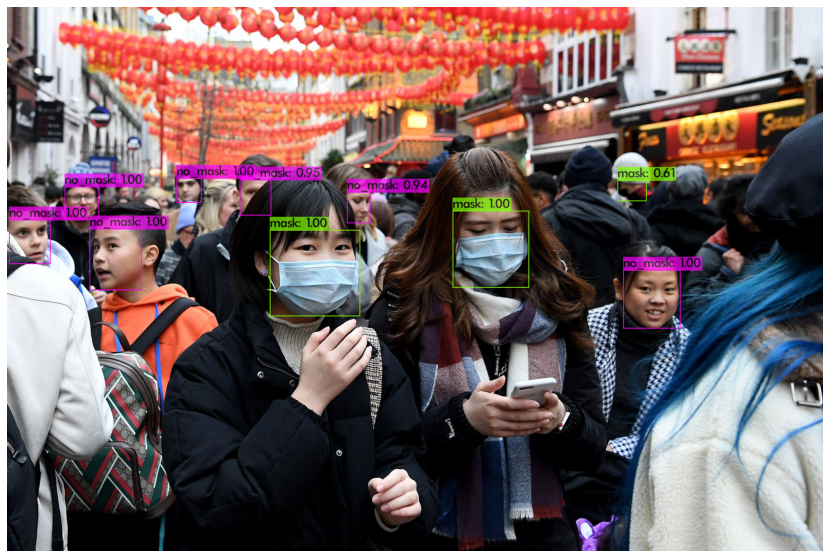

In [ ]:
imShow('predictions.jpg')

###**b. Image from Camera Capture**

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [ ]:
%cd /content/drive/MyDrive/CS117/Yolo

/content/drive/.shortcut-targets-by-id/1A5FuNQ6DfCng0mmx--uly90KuknjIizg/CS117/Yolo


<IPython.core.display.Javascript object>

Saved to photo.jpg


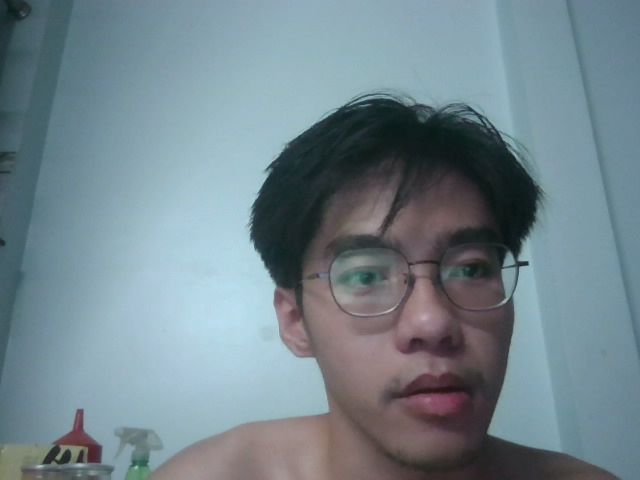

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [ ]:
%cd /content/drive/MyDrive/CS117/Yolo/darknet/
# !./darknet detector test <path to .data file> <path to config> <path to weights> <path to image>
!./darknet detector test "/content/drive/MyDrive/CS117/Yolo/darknet/yolo.data" "/content/drive/MyDrive/CS117/Yolo/darknet/cfg/yolov4-custom.cfg" "/content/drive/MyDrive/CS117/Yolo/darknet/backup/yolov4-custom_best.weights" "/content/drive/MyDrive/CS117/Yolo/photo.jpg"

/content/drive/.shortcut-targets-by-id/1A5FuNQ6DfCng0mmx--uly90KuknjIizg/CS117/Yolo/darknet
/bin/bash: ./darknet: Permission denied


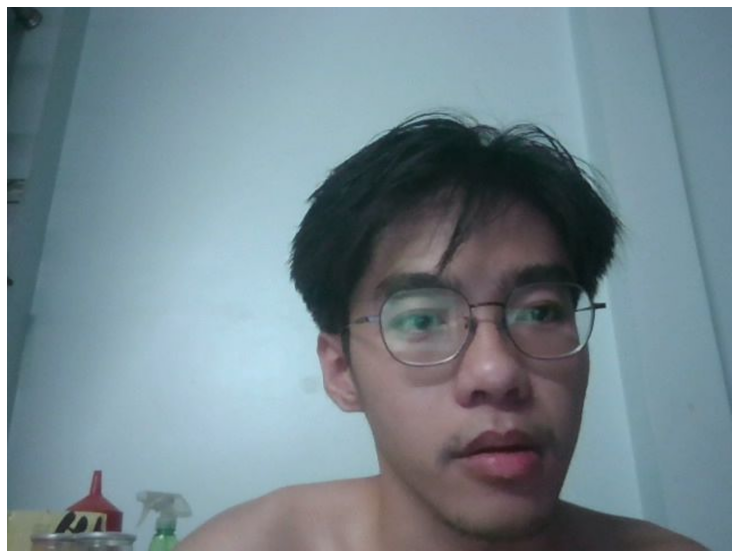

In [ ]:
imShow('photo.jpg')

###**c. Image from Local**

In [ ]:
%cd /content/drive/MyDrive/CS117/Yolo
upload_image()
%cd /content/drive/MyDrive/CS117/Yolo/darknet/

/content/drive/.shortcut-targets-by-id/1A5FuNQ6DfCng0mmx--uly90KuknjIizg/CS117/Yolo


KeyboardInterrupt: ignored

In [ ]:
%cd /content/drive/MyDrive/CS117/Yolo/darknet/
# !./darknet detector test <path to .data file> <path to config> <path to weights> <path to image>
!./darknet detector test "/content/drive/MyDrive/CS117/Yolo/darknet/yolo.data" "/content/drive/MyDrive/CS117/Yolo/darknet/cfg/yolov4-custom.cfg" "/content/drive/MyDrive/CS117/Yolo/darknet/backup/a.weights" "/content/drive/MyDrive/CS117/Yolo/ThaiTrinh.png"

/content/drive/.shortcut-targets-by-id/1A5FuNQ6DfCng0mmx--uly90KuknjIizg/CS117/Yolo/darknet
/bin/bash: ./darknet: Permission denied


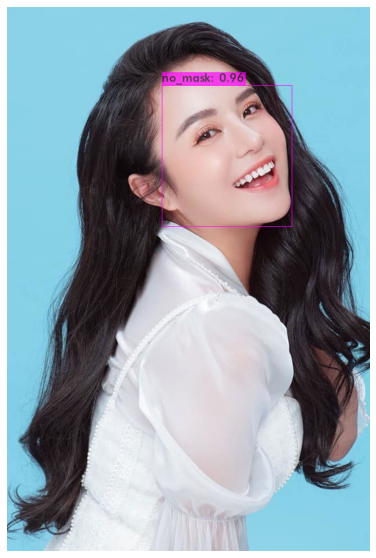

In [ ]:
imShow('predictions.jpg')

#**4. Predict Video**

###**a. Video from Google Drive**

In [ ]:
#Thay đổi link video input và output ở cuối
!./darknet detector demo "/content/drive/MyDrive/CS117/Yolo/darknet/yolo.data" "/content/drive/MyDrive/CS117/Yolo/darknet/cfg/yolov4-custom.cfg" "/content/drive/MyDrive/CS117/Yolo/darknet/backup/yolov4-custom_best.weights" -dont_show "../fFacebook.mp4" -i 0 -out_filename "../results.avi"

In [ ]:
# Thay đổi link video download
download('../results.avi')

###**b. Video from Local**

In [ ]:
%cd /content/drive/MyDrive/CS117/Yolo
upload_video()
%cd /content/drive/MyDrive/CS117/Yolo/darknet/

/content/drive/MyDrive/CS117/Yolo


Saving BỘ Y TẾ HƯỚNG DẪN ĐEO KHẨU TRANG ĐÚNG CÁCH.mp4 to BỘ Y TẾ HƯỚNG DẪN ĐEO KHẨU TRANG ĐÚNG CÁCH.mp4
saved file BỘ Y TẾ HƯỚNG DẪN ĐEO KHẨU TRANG ĐÚNG CÁCH.mp4
/content/drive/MyDrive/CS117/Yolo/darknet


In [ ]:
!./darknet detector demo "/content/drive/MyDrive/CS117/Yolo/darknet/yolo.data" "/content/drive/MyDrive/CS117/Yolo/darknet/cfg/yolov4-custom.cfg" "/content/drive/MyDrive/CS117/Yolo/darknet/backup/a.weights" -dont_show "../BỘ Y TẾ HƯỚNG DẪN ĐEO KHẨU TRANG ĐÚNG CÁCH.mp4" -i 0 -out_filename "../results_final.avi"

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.

mask: 100% 

FPS:13.0 	 AVG_FPS:12.8

 cvWriteFrame 
Objects:

mask: 100% 

FPS:13.1 	 AVG_FPS:12.8

 cvWriteFrame 
Objects:

mask: 100% 

FPS:12.9 	 AVG_FPS:12.8

 cvWriteFrame 
Objects:

mask: 100% 

FPS:13.0 	 AVG_FPS:12.8

 cvWriteFrame 
Objects:

mask: 100% 

FPS:13.1 	 AVG_FPS:12.8

 cvWriteFrame 
Objects:

mask: 100% 

FPS:13.0 	 AVG_FPS:12.8

 cvWriteFrame 
Objects:

mask: 100% 

FPS:12.9 	 AVG_FPS:12.8

 cvWriteFrame 
Objects:

mask: 100% 

FPS:12.9 	 AVG_FPS:12.8

 cvWriteFrame 
Objects:

mask: 100% 

FPS:12.7 	 AVG_FPS:12.8

 cvWriteFrame 
Objects:

mask: 100% 

FPS:12.5 	 AVG_FPS:12.8

 cvWriteFrame 
Objects:

mask: 100% 

FPS:12.5 	 AVG_FPS:12.8

 cvWriteFrame 
Objects:

mask: 100% 

FPS:12.3 	 AVG_FPS:12.8

 cvWriteFrame 
Objects:

mask: 100% 

FPS:12.4 	 AVG_FPS:12.8

 cvWriteFrame 
Objects:

mask: 100% 

FPS:12.3 	 AVG_FPS:12.8

 cvWriteFrame 
Objects:

mask: 100% 

FPS:12.4 	 AVG_FPS:12.8

 cvWriteFrame 
Objects

In [ ]:
# download the video with detections shown
download('../results_final.avi')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#**5. Predict Webcam realtime**

In [ ]:
%cd /content/drive/MyDrive/CS117/Yolo/darknet/

/content/drive/.shortcut-targets-by-id/1A5FuNQ6DfCng0mmx--uly90KuknjIizg/CS117/Yolo/darknet


In [ ]:
from darknet import *
# load in our YOLOv4 architecture network
network, class_names, class_colors = load_network("/content/drive/MyDrive/CS117/Yolo/darknet/cfg/yolov4-custom.cfg", "/content/drive/MyDrive/CS117/Yolo/darknet/yolo.data", "/content/drive/MyDrive/CS117/Yolo/darknet/backup/a.weights")
width = network_width(network)
height = network_height(network)

# darknet helper function to run detection on image
def darknet_helper(img, width, height):
  darknet_image = make_image(width, height, 3)
  img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  img_resized = cv2.resize(img_rgb, (width, height),
                              interpolation=cv2.INTER_LINEAR)

  # get image ratios to convert bounding boxes to proper size
  img_height, img_width, _ = img.shape
  width_ratio = img_width/width
  height_ratio = img_height/height

  # run model on darknet style image to get detections
  copy_image_from_bytes(darknet_image, img_resized.tobytes())
  detections = detect_image(network, class_names, darknet_image)
  free_image(darknet_image)
  return detections, width_ratio, height_ratio

In [ ]:
# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

In [ ]:
# JavaScript to properly create our live video stream using our webcam as input
def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;
    
    var pendingResolve = null;
    var shutdown = false;
    
    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }
    
    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }
    
    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);
      
      const modelOut = document.createElement('div');
      modelOut.innerHTML = "<span>Status:</span>";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);
           
      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);
      
      const instruction = document.createElement('div');
      instruction.innerHTML = 
          '<span style="color: red; font-weight: bold;">' +
          'When finished, click here or on the video to stop this demo</span>';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };
      
      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 640; //video.videoWidth;
      captureCanvas.height = 480; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);
      
      return stream;
    }
    async function stream_frame(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();
      
      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }
            
      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }
      
      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;
      
      return {'create': preShow - preCreate, 
              'show': preCapture - preShow, 
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)
  
def video_frame(label, bbox):
  data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))
  return data

In [ ]:
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from google.colab.patches import cv2_imshow
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL
import io
import html
import time
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# start streaming video from webcam
video_stream()
# label for video
label_html = 'Capturing...'
# initialze bounding box to empty
bbox = ''
count = 0 
while True:
    js_reply = video_frame(label_html, bbox)
    if not js_reply:
        break

    # convert JS response to OpenCV Image
    frame = js_to_image(js_reply["img"])

    # create transparent overlay for bounding box
    bbox_array = np.zeros([480,640,4], dtype=np.uint8)

    # call our darknet helper on video frame
    detections, width_ratio, height_ratio = darknet_helper(frame, width, height)

    # loop through detections and draw them on transparent overlay image
    for label, confidence, bbox in detections:
      left, top, right, bottom = bbox2points(bbox)
      left, top, right, bottom = int(left * width_ratio), int(top * height_ratio), int(right * width_ratio), int(bottom * height_ratio)
      bbox_array = cv2.rectangle(bbox_array, (left, top), (right, bottom), class_colors[label], 2)
      bbox_array = cv2.putText(bbox_array, "{} [{:.2f}]".format(label, float(confidence)),
                        (left, top - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5,
                        class_colors[label], 2)

    bbox_array[:,:,3] = (bbox_array.max(axis = 2) > 0 ).astype(int) * 255
    # convert overlay of bbox into bytes
    bbox_bytes = bbox_to_bytes(bbox_array)
    # update bbox so next frame gets new overlay
    bbox = bbox_bytes

<IPython.core.display.Javascript object>

KeyboardInterrupt: ignored